In [3]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import numpy as np
import scipy.stats as st
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

<IPython.core.display.Javascript object>


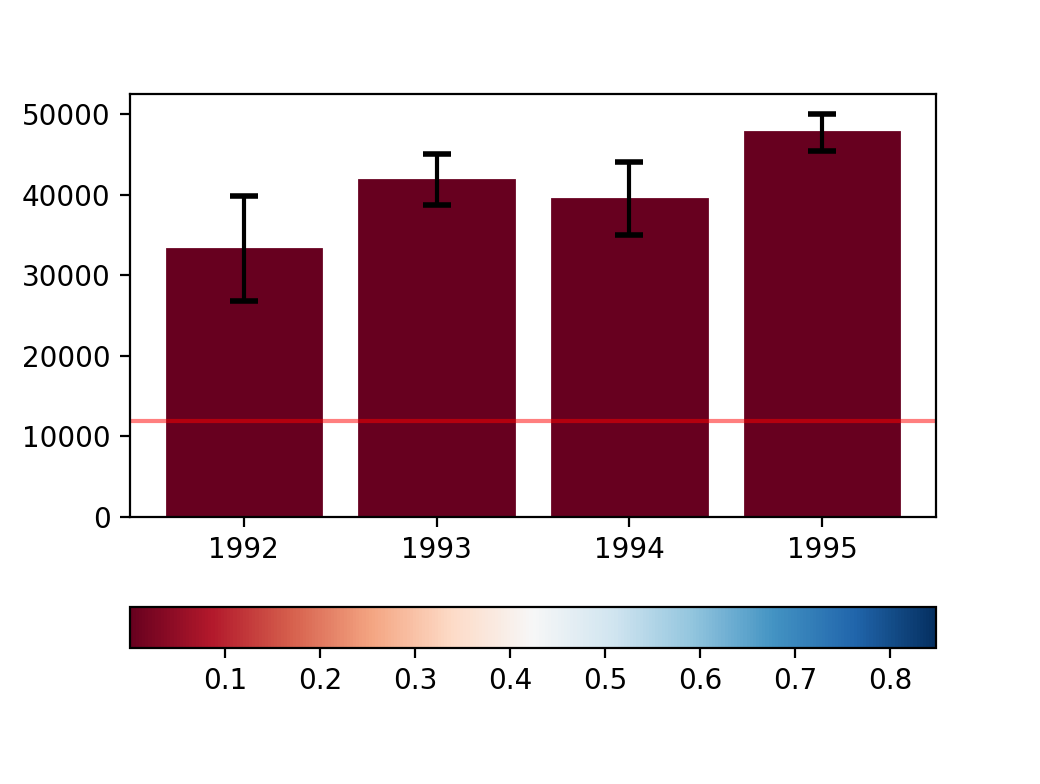

In [6]:
# mean and margin of error for generated data
mn = df.mean(axis=1)
m_err = st.sem(df, axis = 1) * st.norm.ppf(.975)

# initial threshold and calculation
thr = 40000
vals = st.norm.cdf((thr - mn)/m_err)

# plot and initial colors
fig, ax = plt.subplots()

cpick = cm.ScalarMappable(cmap = cm.RdBu)
cpick.set_array([])

bars = ax.bar(df.index,mn, color = cpick.to_rgba(vals), yerr = m_err, error_kw=dict(capsize=5, capthick=2))
hline = ax.axhline(y = thr, color = 'red', alpha = 0.5)  
tix = plt.xticks(df.index.values)
cb = plt.colorbar(cpick, orientation = 'horizontal')

# event handling and re-coloring of bars
def recolor_bars(y):
    vals = st.norm.cdf((y - mn)/m_err)
    for bar, p in zip(bars, vals):
        bar.set_color(cpick.to_rgba(p))

def onclick(event):
    hline.set_ydata(event.ydata)
    recolor_bars(event.ydata)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()